## CS 435-02 Advanced Deep Learning
## Assignment 2
## Building a Convolutional Autoencoder to classify images in the Fashion-MINIST Dataset

We will work with the Fashion-MINIST Dataset.  This is a well-known dataset for image classification, which consists of 60000 28x28 gray images in 10 classes. There are 60000 training images and 10000 test images.

The 10 classes are:

<ol start="0">
<li> Shirt
<li> T-Shirt/Top
<li> T-Shirt/Top
<li> Ankle boot
<li> Sandal
<li> Dress
<li> Sneaker
<li> Trouser
<li> Bag
<li> Coat
</ol>

For details about Fashion-MINIST see:
https://github.com/zalandoresearch/fashion-mnist


### Building Vanila Autoencoder, Convolutional Autoencoder, variational autoencoder and denoising autoencoder

In this exercise we will build and train our first Simple Vanila autoencoder.  In the first part, we walk through the different layers and how they are configured.  In the second part, you will build your own model, train it, and compare the performance.

What is an AUTOENCODER ?

Autoencoders are a type of neural network that attempts to mimic its input as closely as possible to its output.
It has aims to take an input, transform it into a reduced representation called Embedding or Latent Space representation. Then, this embedding is transformed back into the original input.

**Architecture of Autoencoders**
An Autoencoder consists of three main components :

*   Encoder
*   Embedding (Bottleneck)
*   Decoder

![Google's logo](https://miro.medium.com/max/3110/0*uq2_ZipB9TqI9G_k)

**Types of Autoencoders :**
1.   Vanilla Autoencoder
2.   Convolutional Autoencoder
3.   Denoising Autoencoder
4.   Variational Autoencoder

etc...

In [5]:
# loading improtant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Dense, Input, Flatten,\
Conv2DTranspose, BatchNormalization, LeakyReLU, Reshape, MaxPooling2D, UpSampling2D, Activation
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.datasets import fashion_mnist
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adadelta
import tensorflow as tf
import tensorflow_datasets as tfds
import plotly
import plotly.express as px

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype("float32")/255.
x_test = x_test.astype("float32")/255.
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


SyntaxError: invalid syntax (1099229136.py, line 7)

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


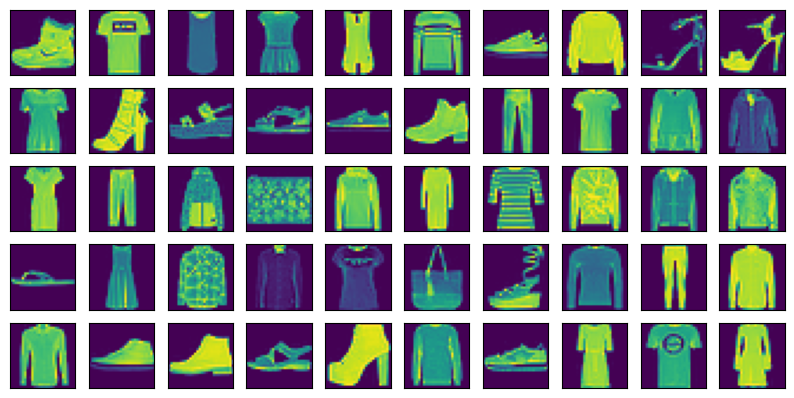

In [7]:
# Ploting the original images
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

plt.figure(figsize=(10,10))
for index in range(50):
    plt.subplot(10,10,index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[index])
plt.show()

In [ ]:
fashionMNIST_classes = {0:"T-shirt/top", 1:"Trouser",
                        2:"Pullover", 3:"Dress",
                        4:"Coat", 5:"Sandal",
                        6:"Shirt", 7:"Sneaker",
                        8:"Bag", 9:"Ankle boot"}

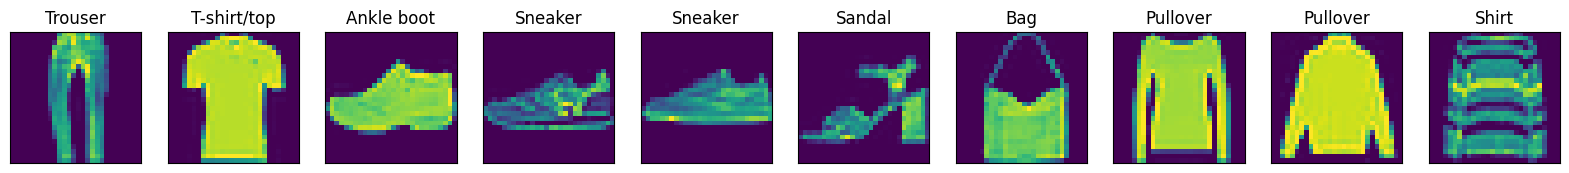

In [ ]:
n = 10
plt.figure(figsize = (20, 4))
for i in range(n):
    plt.subplot(1, n, i+1)
    idx = np.random.randint(i, len(x_train))
    plt.imshow(x_train[idx])
    plt.title(fashionMNIST_classes[y_train[idx]])
    #plt.gray()
    plt.xticks([]); plt.yticks([])
plt.show()

**First Building Vanila Autoencoder**

A Vanilla Autoencoder is a straightforward yet powerful framework for unsupervised learning tasks. It consists of two main components: an encoder and a decoder. These components work together to compress input data into a lower-dimensional representation and then reconstruct the data.

Training a Vanilla Autoencoder involves minimizing the reconstruction error, which measures the difference between the original input data and the reconstructed output.

This process is typically achieved through backpropagation, where the gradients of the reconstruction error with respect to the model parameters are calculated. These gradients are then used to update the weights of the neural network layers.

The goal is to optimize the parameters so that the reconstructed output closely resembles the original input.




In [ ]:
# Vanilla Autoencoder

encoding_dim = 64  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image (encoder layer)
input_img = tf.keras.Input(shape=(28,28))
# "encoded" is the encoded representation of the input (latent space layer)
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input (decoder)
decoded = layers.Dense(28, activation='sigmoid')(encoded)


# This model maps an input to its reconstruction
autoencoder = tf.keras.Model(input_img, decoded)

In [ ]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 28, 64)              │           1,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 28, 28)              │           1,820 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,676 (14.36 KB)

 Trainable params: 3,676 (14.36 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
history = autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.5588 - val_loss: 0.3197
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2995 - val_loss: 0.2759
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2705 - val_loss: 0.2654
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2622 - val_loss: 0.2602
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2567 - val_loss: 0.2569
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2546 - val_loss: 0.2545
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2523 - val_loss: 0.2524
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2503 - val_loss: 0.2514
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2495 - val_loss: 0.2508
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2487 - val_loss: 0.2503


In [ ]:
# Checking the test results.
# The Test score is in the format of loss, mean absolute error and accuracy
score = autoencoder.evaluate(x_test, x_test)
print(score)
prediction_data = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2504
0.250339537858963
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


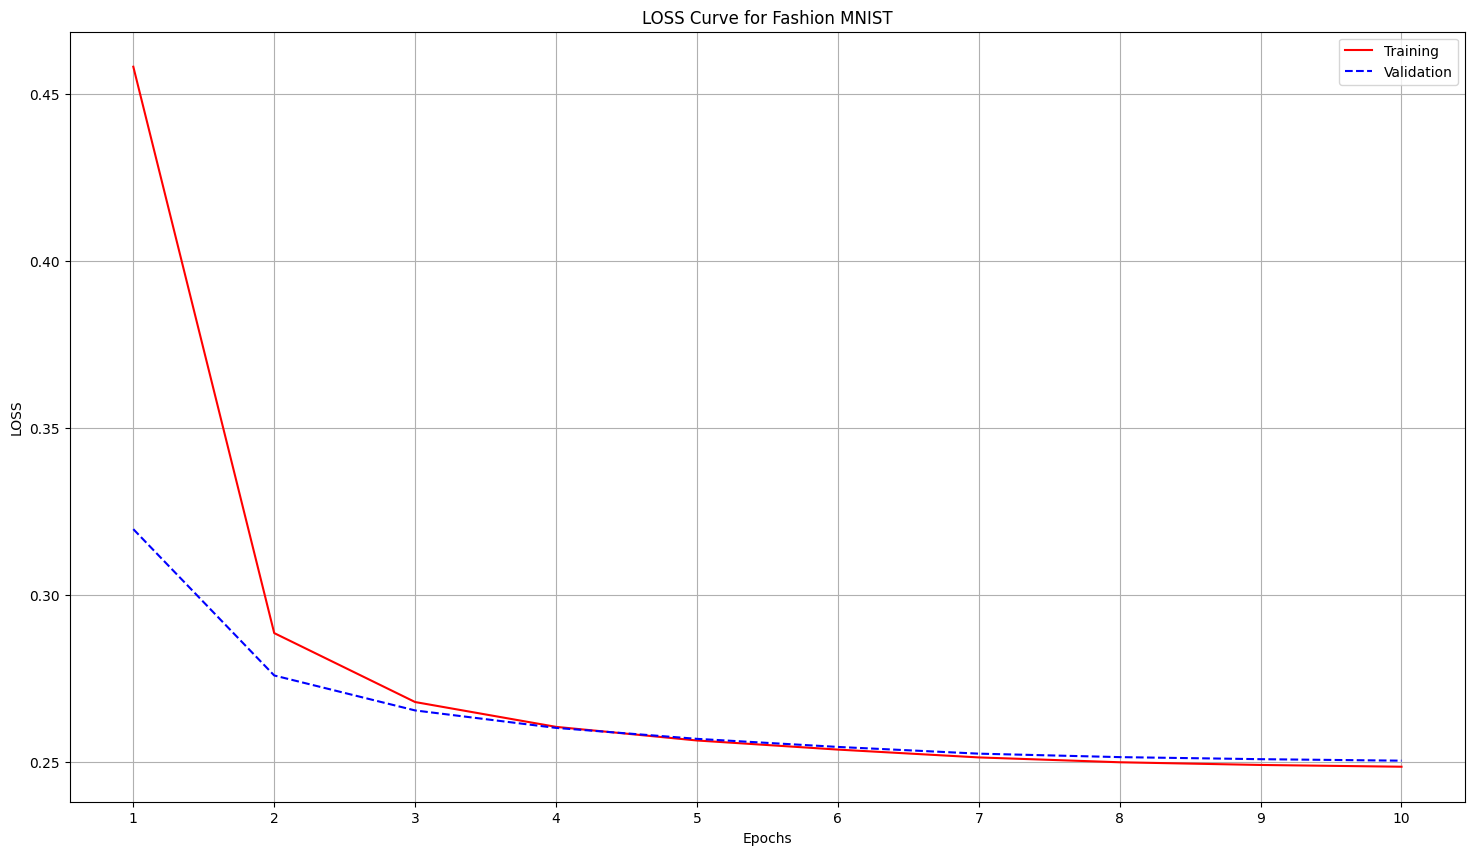

In [ ]:
# Storing our training and validation losses
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = [d for d in range(1,11)]

# Code for plotting train and val loss
plt.figure(figsize=(18, 10))
plt.plot(epochs, train_loss, '-r', label="Training")
plt.plot(epochs, val_loss, '--b', label="Validation")
plt.title("LOSS Curve for Fashion MNIST")
plt.grid(True)
plt.xlabel('Epochs'); plt.ylabel("LOSS")
plt.legend()
plt.xticks([d for d in range(1, 11)])
plt.show();

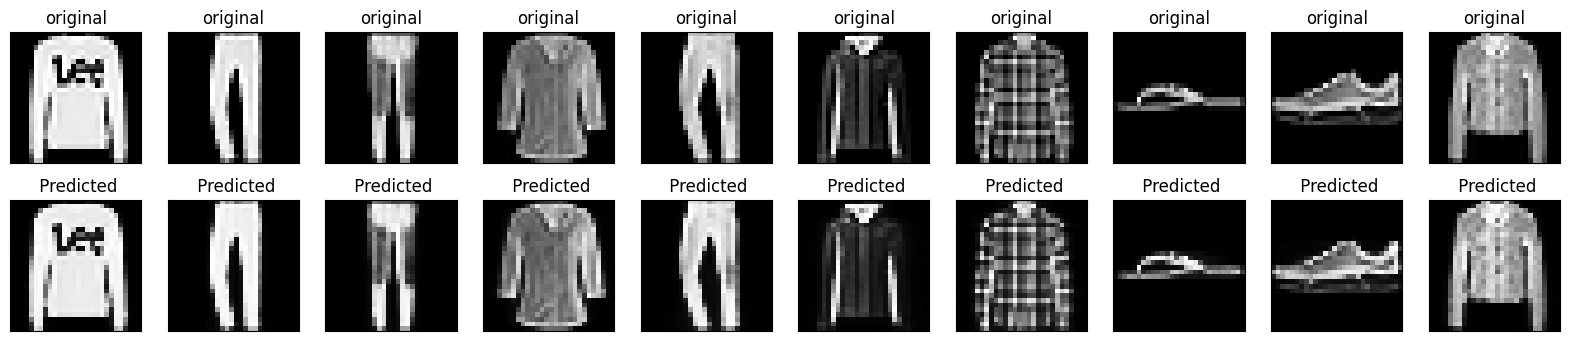

In [ ]:
# collecting the encoded and decoded versions of our test data
# Showing the original and predicted images of all 10 classes.
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    plt.title('original')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(prediction_data[i].reshape(28,28))
    plt.gray()
    plt.title(' Predicted')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Convolutional Autoencoder

Convolutional autoencoders are specifically designed to handle high-dimensional data with spatial structures, such as images. They utilize convolutional layers to capture spatial dependencies and hierarchical features within the input data. This architecture allows them to efficiently encode and decode complex patterns, making them particularly well-suited for tasks such as image reconstruction, denoising, and feature extraction.

Training convolutional autoencoders involves optimizing the model parameters to minimize the reconstruction error between the input and output data. This process is typically achieved through backpropagation and gradient descent, where the weights of the convolutional and fully connected layers are iteratively adjusted to minimize the loss function. Common loss functions used include mean squared error (MSE) or binary cross-entropy, depending on the nature of the input data.

In [ ]:
# Let's build a CNN using Keras' Sequential capabilities
# As we know that CNN are good for image classification. We can use Convolution 2D for our encoder and decoder layers.

input_img = tf.keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencodercnn = tf.keras.Model(input_img, decoded)
autoencodercnn.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencodercnn.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

history_cnn = autoencodercnn.fit(x_train, x_train,
                    batch_size=32,
                    epochs=15,
                    verbose=1,
                    validation_data=(x_test, x_test),
                    shuffle=True)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 0.3631 - val_loss: 0.2975
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 0.2937 - val_loss: 0.2916
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.2892 - val_loss: 0.2890
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.2861 - val_loss: 0.2869
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2838 - val_loss: 0.2852
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2828 - val_loss: 0.2840
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.2818 - val_loss: 0.2837
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.2804 - val_loss: 0.2822
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2801 - val_loss: 0.2817
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.2794 - val_loss: 0.2818
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.2788 - val_loss: 0.2807
Epoch 12/15
1875/1875 ━━

In [ ]:
# Checking the test results.
# The Test score is in the format of loss, mean absolute error and accuracy
score = autoencodercnn.evaluate(x_test, x_test)
print(score)
prediction_data_cnn = autoencodercnn.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2799
0.27990585565567017
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


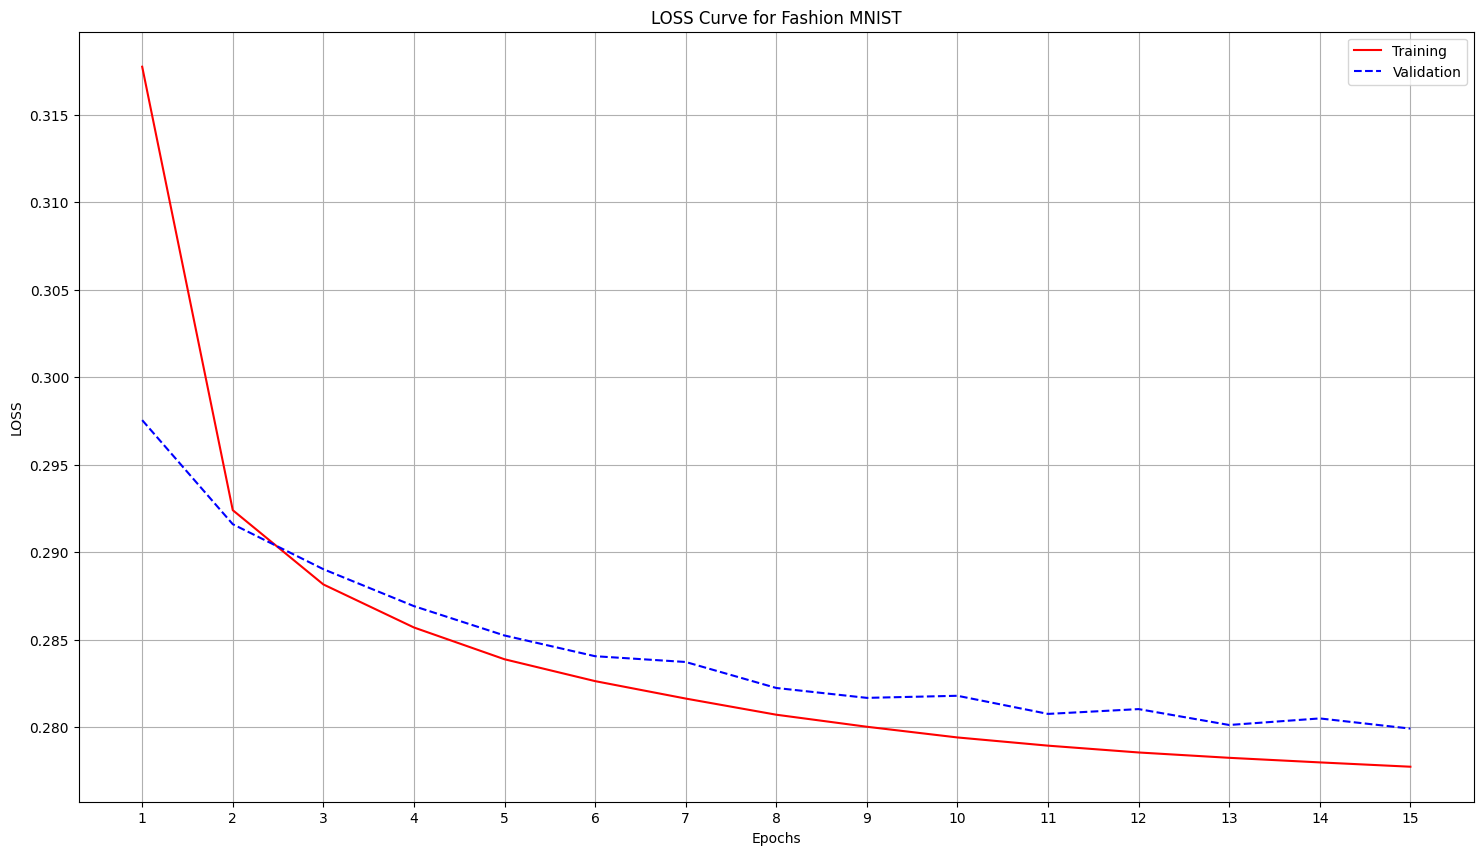

In [ ]:
# Storing our training and validation losses
train_loss_cnn = history_cnn.history["loss"]
val_loss_cnn = history_cnn.history["val_loss"]
epochs = [d for d in range(1,16)]

# Code for plotting train and val loss
plt.figure(figsize=(18, 10))
plt.plot(epochs, train_loss_cnn, '-r', label="Training")
plt.plot(epochs, val_loss_cnn, '--b', label="Validation")
plt.title("LOSS Curve for Fashion MNIST")
plt.grid(True)
plt.xlabel('Epochs'); plt.ylabel("LOSS")
plt.legend()
plt.xticks([d for d in range(1, 16)])
plt.show();

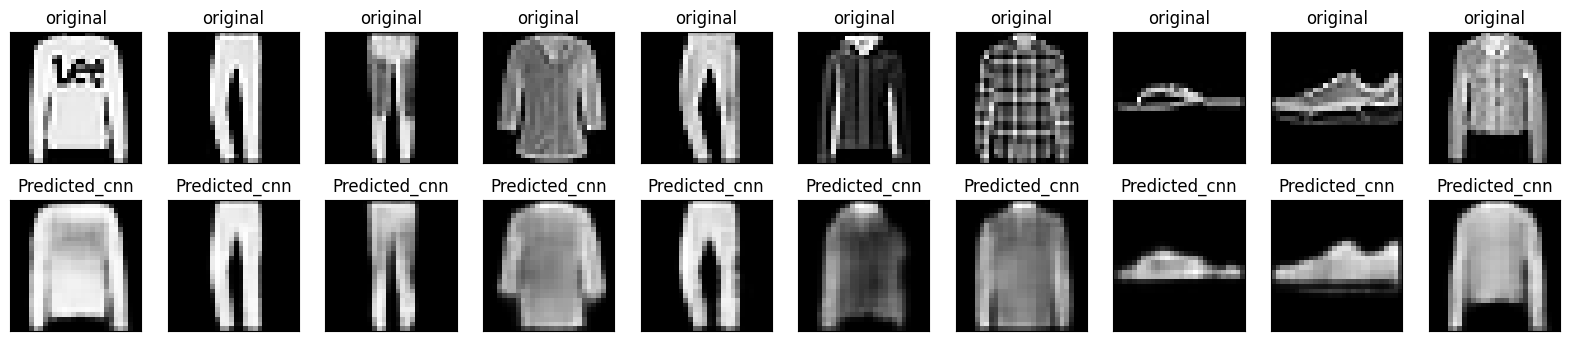

In [ ]:
# Showing the original and predicted images of all 10 classes.
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    plt.title('original')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(prediction_data_cnn[i].reshape(28,28))
    plt.gray()
    plt.title('Predicted_cnn')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Exercise_1 on Deep Convolutional_autoencoder

---



1. Build a more complicated model with the following pattern:
- Conv -> Conv -> MaxPool -> Conv -> bootlneck -> Conv -> Conv -> Conv -> MaxPool -> Conv

2. How many parameters does your model have?  How does that compare to the previous model?

3. Train it for 15 epochs.  What do you notice about the training time, loss and accuracy numbers (on both the training and validation sets)?

In [ ]:
# Please provide your solution here
# Create model_1 to show results
# also plot the original and reconstructed images

# Denoising Autoencoder
A denoising autoencoder is a modification of the original autoencoder in which instead of giving the original input we give a corrupted or noisy version of input to the encoder while decoder loss is calculated concerning original input only. This results in efficient learning of autoencoders and the risk of autoencoder becoming an identity function is significantly reduced.

It consists of two main components:

Encoder:
The encoder is a neural network with one or more hidden layers.
It receives noisy input data instead of the original input and generates an encoding in a low-dimensional space.
There are several ways to generate a corrupted input. The most common being adding a Gaussian noise or randomly masking some of the inputs.

Decoder:
Similar to encoders, decoders are implemented as neural networks with one or more hidden layers.
It takes the encoding generated by the encoder as input and reconstructs the original data.
When calculating the Loss function it compares the output values with the original input, not with the corrupted input.

In [ ]:
# loading the dataset
(x_train_n, y_train), (x_test_n, y_test) = fashion_mnist.load_data()

x_train_n = x_train.astype('float32') / 255.
x_test_n = x_test.astype('float32') / 255.
x_train_n = np.reshape(x_train_n, (len(x_train_n), 28,28,1))
x_test_n = np.reshape(x_test_n, (len(x_test_n), 28,28,1))

# adding noise to the original images
noise_factor = 0.001
x_train_noisy = x_train_n + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_n.shape)
x_test_noisy = x_test_n + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_n.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

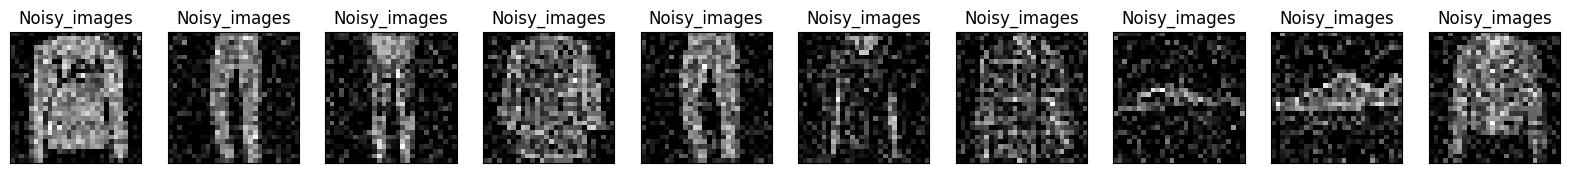

In [ ]:
# plotting the noisy images.
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    plt.title('Noisy_images')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
input_img = tf.keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_noisy = tf.keras.Model(input_img, decoded)
autoencoder_noisy.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder_noisy.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 7, 7, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_3 (UpSampling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_4 (UpSampling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,353 (110.75 KB)

 Trainable params: 28,353 (110.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training the model using noisy input to check if autoencoder learn to recover the original images.
history_noisy = autoencoder_noisy.fit(x_train_noisy, x_train,
                    batch_size=64,
                    epochs=5,
                    verbose=1,
                    validation_data=(x_test_noisy, x_test),
                    shuffle=True)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.4559 - val_loss: 0.3084
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.3040 - val_loss: 0.3004
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.2964 - val_loss: 0.2956
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2914 - val_loss: 0.2916
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2892 - val_loss: 0.2894


In [ ]:
# Checking the test results.
# The Test score is in the format of loss, mean absolute error and accuracy
score = autoencoder_noisy.evaluate(x_test_noisy, x_test)
print(score)
prediction_data_noisy = autoencoder_noisy.predict(x_test_noisy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2896
0.2893921136856079
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


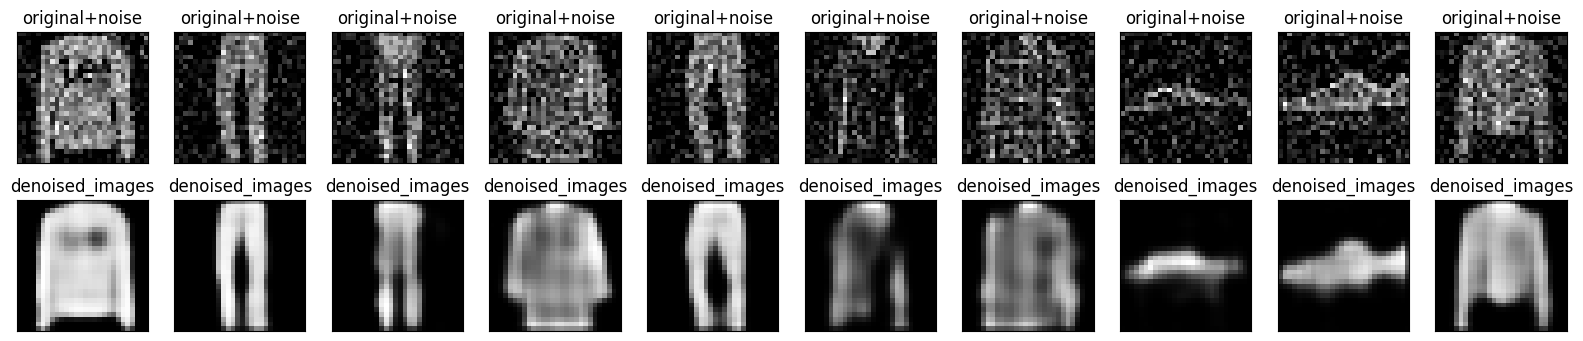

In [ ]:
# Showing the original and predicted images of all 10 classes.
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    plt.title('original+noise')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(prediction_data_noisy[i].reshape(28,28))
    plt.gray()
    plt.title('denoised_images')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Exercise_2 on Denoising_autoencoder

---



1. Build a more complicated model based on your understnading that gives more accuracte model than the above denoising model.

2. How many parameters does your model have?  How does that compare to the previous model?

3. Train it for 15 epochs.  What do you notice about the training time, loss and accuracy numbers (on both the training and validation sets)?

4. Change the noise factor between the range of 0 to 1 and compare the difference in denoised images.

In [ ]:
# Please provide your solution here
# Create model_2 to show results
# also plot the original and reconstructed images

# **Variational Autoencoder **

Variational Autoencoders (VAEs) are generative models in machine learning (ML) that create new data similar to the input they are trained on. Along with data generation they also perform common autoencoder tasks like denoising. Like all autoencoders VAEs consist of:

*   Encoder: Learns important patterns (latent variables) from input data.
*   Decoder: It uses those latent variables to reconstruct the input.

![Google's logo](https://media.geeksforgeeks.org/wp-content/uploads/20231201153426/Variational-AutoEncoder.png)

You can read more about the archiecture and calcuation from https://www.geeksforgeeks.org/variational-autoencoders/




In [2]:
# Loading the data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Define the latent space dimension
latent_dim = 2


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# defining the bottlnenck layer
def sampling(args):
  mean, logvar = args
  eps = K.random_normal([latent_dim])
  rnd_sam = mean + K.exp(logvar/2) * eps
  return rnd_sam

In [4]:
# Create encoder
enc_input = Input(shape=(28,28,1), name='encoder input')
x = Conv2D(128, 5, padding='same', activation='relu')(enc_input)
x = Conv2D(64, 3, padding='same', strides=2, activation='relu')(x)
x = Conv2D(64, 3, padding='same', activation='relu')(x)
x = Conv2D(64, 3, padding='same', activation='relu')(x)
enc_shape = (x.shape)
x = Flatten()(x)
x = Dense(32)(x)

z_mean = Dense(latent_dim, name='Z-mean')(x)
z_logvar = Dense(latent_dim, name='Z-logvariance')(x)

z = layers.Lambda(sampling, output_shape=(latent_dim,), name='latent-space')([z_mean, z_logvar])
encoder = tf.keras.Model(enc_input, z, name='encoder')

# Create decoder
dec_input = Input(shape=(latent_dim,), name='decoder-input')

true_shape = enc_shape[1:]

y = Dense(np.prod(true_shape))(dec_input)
y = Reshape(target_shape=true_shape)(y)
y = Conv2DTranspose(64, 3, padding='same', activation='relu')(y)
y = Conv2DTranspose(64, 3, padding='same', activation='relu')(y)
y = Conv2DTranspose(64, 3, strides=2, padding='same', activation='relu')(y)
y = Conv2DTranspose(128, 5, padding='same', activation='relu')(y)
y = Conv2DTranspose(1, 5, padding='same', activation='relu')(y)
decoder = tf.keras.Model(dec_input, y, name='decoder')

enc_output = encoder(enc_input)
dec_output = decoder(enc_output)

vae = tf.keras.Model(enc_input, dec_output, name='VAE')
vae.summary()
# You can also print encoder and decoder summary using encoder.summary() to see the total parameters in encoder and decoder

Model: "VAE"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ encoder input (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder (Functional)                 │ (None, 2)                   │         552,548 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder (Functional)                 │ (None, 28, 28, 1)           │         356,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 909,093 (3.47 MB)

 Trainable params: 909,093 (3.47 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# definign loss function to calculate reconstrction loss.
def loss_func(z_mean, z_logvar):

    def vae_reconstruction_loss(y_true, y_predict):
        reconstruction_loss_factor = 100
        reconstruction_loss = K.mean(K.square(y_true-y_predict), axis=[1, ])
        return reconstruction_loss_factor * reconstruction_loss

    def vae_kl_loss(z_mean, z_logvar):
        kl_loss = -0.5 * K.sum(1.0 + z_logvar - K.square(z_mean) - K.exp(z_logvar), axis=1)
        return kl_loss

    def vae_kl_loss_metric(y_true, y_predict):
        kl_loss = -0.5 * K.sum(1.0 + z_logvar - K.square(z_mean) - K.exp(z_logvar), axis=1)
        return kl_loss

    def vae_loss(y_true, y_predict):
        reconstruction_loss = vae_reconstruction_loss(y_true, y_predict)
        kl_loss = vae_kl_loss(y_true, y_predict)

        loss = reconstruction_loss + kl_loss
        return loss

    return vae_loss

In [6]:
# Create and train the VAE
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
vae.compile(optimizer=opt, loss=loss_func(z_mean, z_logvar))

In [7]:
#X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
#X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

history_vae = vae.fit(X_train,X_train, epochs=50, batch_size=32, validation_data=(X_test,X_test))

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 14ms/step - loss: 10.2034 - val_loss: 7.6736
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - loss: 7.6304 - val_loss: 7.4912
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - loss: 7.5077 - val_loss: 7.4187
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - loss: 7.4161 - val_loss: 7.3654
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - loss: 7.3366 - val_loss: 7.3462
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - loss: 7.2831 - val_loss: 7.2581
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - loss: 7.2718 - val_loss: 7.2557
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - loss: 7.2215 - val_loss: 7.2079
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - loss: 7.1652 - val_loss: 7.2165
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - loss: 7.1650 - val_loss: 7.1807
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - loss: 7.1573 - val_loss: 7.1665
Epoch 1

In [8]:
# Checking the test results.
score = vae.evaluate(X_test, X_test)
print(score)
prediction_data_vae = vae.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 6.9472
6.935300827026367
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


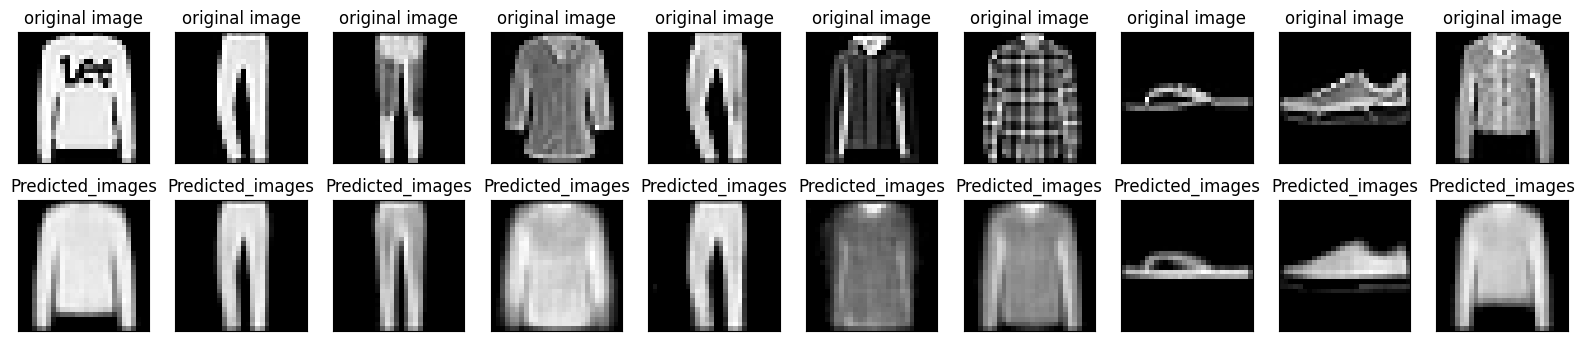

In [10]:
# Showing the original and predicted images of all 10 classes.
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(X_test[i].reshape(28,28))
    plt.gray()
    plt.title('original image')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(prediction_data_vae[i].reshape(28,28))
    plt.gray()
    plt.title('Predicted_images')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Exercise_3 on Variational_autoencoder

---



1. Build a more complicated model based on your understanding that generates more accurate model.

2. How many parameters does your model have?  How does that compare to the previous model?

3. Train it for 50 epochs.  What do you notice about the training time, loss and accuracy numbers (on both the training and validation sets)?

In [ ]:
# Please provide your solution here
# Create model_3 to show results
# also plot the original and reconstructed images